<a href="https://colab.research.google.com/github/steveLim0928/Foundation-in-ML/blob/main/Auto_Differentiation_Jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import jax.numpy as jnp
from jax import grad, vmap, random

In [2]:
# %env JAX_PLATFORM_NAME=cpu
# If we uncomment the magic env line above, you won't 
# see the error of not finding a GPU/TPU  when you first call JAX (below)

In ordinary numpy we can define an array X and evaluate a numpy native function on X

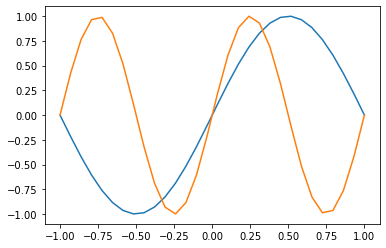

In [3]:
Xn=np.linspace(-1,1,30)
y1=np.sin(Xn*(np.pi))
y2=np.sin(Xn*(2*np.pi))
plt.plot(Xn,y1)
plt.plot(Xn,y2)

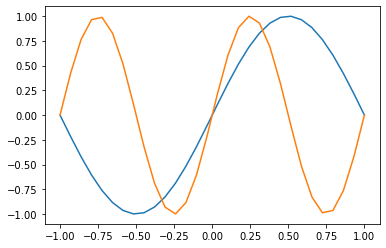

In [4]:
def wsin(w, xin):
    return jnp.array(jnp.sin(w*xin))
Xj=jnp.linspace(-1,1,30)

plt.plot(Xj, wsin(1., np.pi*Xj))
plt.plot(Xj, wsin(2., np.pi*Xj))

In [5]:
print(type(Xn), '\n', type(Xj)) # shows different types created by 2 diff func

<class 'numpy.ndarray'> 
 <class 'jaxlib.xla_extension.DeviceArray'>


JAX creates a different type, suitable for executing on different platforms.

**JAX numpy can give us derivatives of programs**

But now, we can do something in JAX numpy that wasn't possible in numpy. We can ask for the derivative of the function we have just defined. There are two arguments in  y=wsin(w,x) ,  w  and  x . We can define the partial derivatives  (∂/∂x)wsin(w,x)  and  (∂/∂w)wsin(w,x)

In [6]:
d_wsin_x = grad(wsin, argnums=1)
d_wsin_w = grad(wsin, argnums=0)

**Check:**

Verify that these following numbers are correct

In [10]:
print(wsin(1.,0.), d_wsin_x(1., 0.), d_wsin_w(1.,0.))
print(wsin(3.,0.), d_wsin_x(3., 0.), d_wsin_w(3.,0.))

0.0 1.0 0.0
0.0 3.0 0.0


In [8]:
# As before calling wsin on an array returns an array
xvals = jnp.linspace(-1,1,5)
print(xvals,'\n',wsin(1.,np.pi*xvals))

[-1.  -0.5  0.   0.5  1. ] 
 [ 8.742278e-08 -1.000000e+00  0.000000e+00  1.000000e+00 -8.742278e-08]


**Vectorising:**

The grad function does not work on an array. Check for yourself: Try to execute both d_wsin_w(xvals) and d_wsin_x(xvals). You will see

TypeError: Gradient only defined for scalar-output functions. Output had shape: (5,).

In [11]:
# uncomment this 
# d_wsin_w(1.,xvals)

**vmap**

vmap vectorises the grad of function.
Don't worry about the syntax in_axes yet.

In [12]:
grad_wsin_w = vmap(d_wsin_w, in_axes=(None, 0))
grad_wsin_x = vmap(d_wsin_x, in_axes=(None, 0))
print(grad_wsin_w(1., np.pi*xvals))
print(grad_wsin_x(1., np.pi*xvals))

[ 3.1415927e+00  6.8661691e-08  0.0000000e+00 -6.8661691e-08
 -3.1415927e+00]
[-1.000000e+00 -4.371139e-08  1.000000e+00 -4.371139e-08 -1.000000e+00]


You should verify by inspection that the output makes sense.

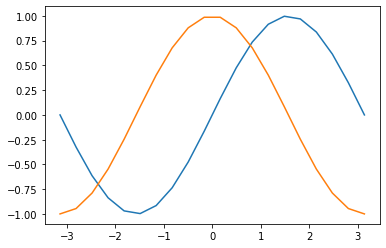

In [13]:
# Having done this, you can now evaluate the gradient on an array 
# and plot the returned array of values
X_plot = np.linspace(-1,1,20)
plt.plot(np.pi*X_plot, wsin(1., np.pi*X_plot))
plt.plot(np.pi*X_plot, grad_wsin_x(1., np.pi*X_plot))

**Note:**

We never called the cosine function. Calling the grad operation on sin enabled the automatic differentiation (AD) routines within JAX to compute (d/dx) sin (x) = cos (x).

**Your turn:**



*   Plot (d/dx) sin(w x) for different values of w.
*   Plot (d/dw) sin(w x) for different values of w.

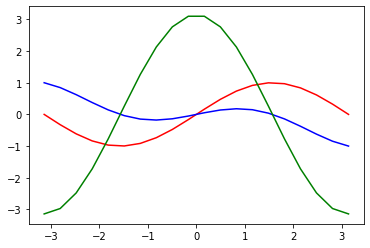

In [18]:
# use x axis for diff val of w and keep x as pi.
grad_wsin_w = vmap(d_wsin_w, in_axes=(0, None))
grad_wsin_x = vmap(d_wsin_x, in_axes=(0, None))

W_plot = np.linspace(-1,1,20)
plt.plot(np.pi*W_plot, wsin(W_plot, np.pi),'r')
plt.plot(np.pi*W_plot, grad_wsin_x(W_plot, np.pi),'b')
plt.plot(np.pi*W_plot, grad_wsin_w(W_plot, np.pi),'g')

In [19]:
def sigmoid(w, xin):
    return jnp.array(1/(1+jnp.exp(-w*xin)))

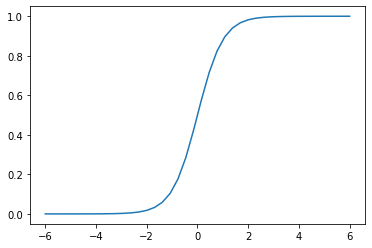

In [20]:
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(2.,X1))

**Your turn:**

define grad_sigmoid in exactly the same way that we defined grad_wsin_x and grad_wsin_w above. First define the scalar version using **grad** with partial derivatives with respect to w and x captured by the arguments **argnums** set to 0 or 1. Then **vmap** the grad with the "in_axes" argument.

In [21]:
d_sigmoid_x = grad(sigmoid, argnums=1)
d_sigmoid_w = grad(sigmoid, argnums=0)

grad_sigmoid_w = vmap(d_sigmoid_w, in_axes=(0, None))
grad_sigmoid_x = vmap(d_sigmoid_x, in_axes=(None, 0))

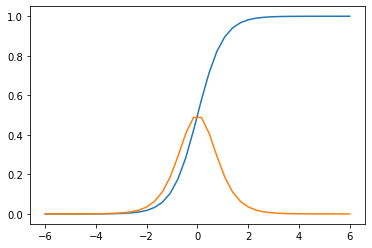

In [26]:
# For const w

# using grad func
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(2.,X1))
plt.plot(X1, grad_sigmoid_x(2., X1))

In [29]:
# compare with manual derivation
def grad_sigmoid_x_man(w, xin):
    return ( (w*jnp.exp(w*xin)) / ((jnp.exp(w*xin)+1)**2) )

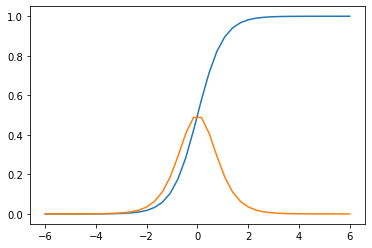

In [30]:
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(2.,X1))
plt.plot(X1, grad_sigmoid_x_man(2., X1))

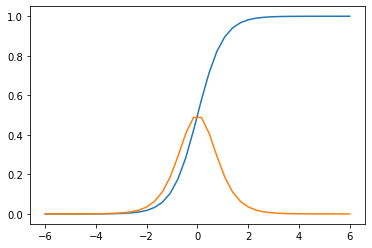

In [35]:
# For const x

# using grad func
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(X1,2.))
plt.plot(X1, grad_sigmoid_w(X1, 2.))

In [36]:
# compare with manual derivation
def grad_sigmoid_w_man(w, xin):
    return ( (xin*jnp.exp(w*xin)) / ((jnp.exp(w*xin)+1)**2) )

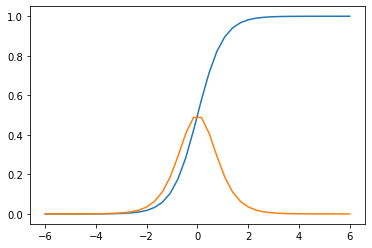

In [38]:
X1 = np.linspace(-6,6,40)
plt.plot(X1, sigmoid(X1,2.))
plt.plot(X1, grad_sigmoid_w_man(X1, 2.))